# __Métricas de error para problemas de Clasificación__

# _Ejercicio 1_:

Tenemos las clases reales de un conjunto de pacientes con diagnóstico de cáncer, donde:

1 : Paciente positivo para cáncer<br>
0 : Paciente nevativo para cáncer<br>

También se cuenta con las etiquetas de predicción del algoritmo de  IA. Hallar la $CM$, $accuracy$ , $precision$ y $recall$  del problema.

$y\_true$ son los valores reales dados por los diagnosticos. 

$y\_pred$ son los valores predichos por el modelo de clasificacion

- $y\_true\ =\ [1,\ 0,\ 0,\ 1,\ 0,\ 0,\ 1,\ 1,\ 0,\ 0,\ 1,\ 1  ]$ <br>
- $y\_pred\ =\ [1,\ 0,\ 1,\ 0,\ 0,\ 0,\ 1 ,\ 1,\ 1,\ 0,\ 1,\ 1]$

In [2]:
y_true = [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]
y_pred = [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]

> De las 12 predicciones, 9 fueron acertadas por el modelo.

Veamos los 12 diagnósticos graficamente para ver cómo se encuentran agrupados.

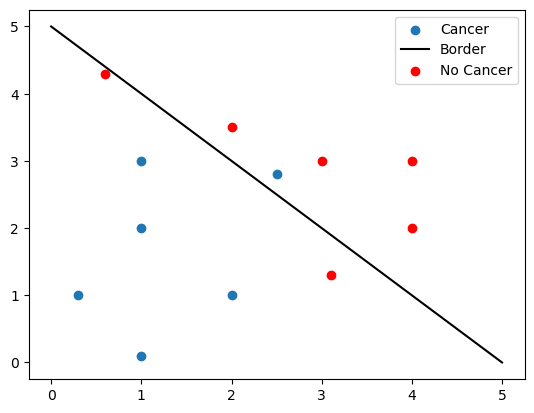

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x1 = [.3,1,1,2,2.5,1]
y1 = [1,2,3,1,2.8,.1]
plt.scatter(x1,y1 , label='Cancer' )
x2 = [4,.6,3,2,4,3.1]
y2 = [2,4.3,3,3.5,3,1.3]
plt.plot([0,5],[5,0], color='black' , label = 'Border' )
plt.scatter(x2,y2, color='red', label='No Cancer')
plt.legend()
plt.show()

> Los puntos rojos son los que el experto declara negativo para cáncer, mientras que los azules son los que declara positivo.

> El modelo, al ser entrenado, traza una línea (border) para diferenciar ambos grupos por lo que todos los puntos que estan por arriba los considera negativo para cáncer y todos los que estan por debajo los considera positivo.

> Vemos 3 puntos que el modelo predijo incorrectamente.

## __1) Matriz de Confusión (CM) para problemas biclase__

Vamos a utilizar la librería Scikit-Learn para obtener las métricas que se requieren.

In [4]:
#importamos la función confusion_matrix
from sklearn.metrics import confusion_matrix

La CM es una herramienta que permite visualizar el rendimiento de un modelo. Cada columna representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.

Nos permite ver qué tipos de aciertos y errores esta teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

La forma general de la CM es:

$$confusion\_matrix(y_{true}, y_{pred})$$

Vamos a pasarle los valores reales y los de predicción.

In [5]:
confusion_matrix(y_true , y_pred)

array([[4, 2],
       [1, 5]])

La misma matriz se puede hacer visiblemente más agradable.

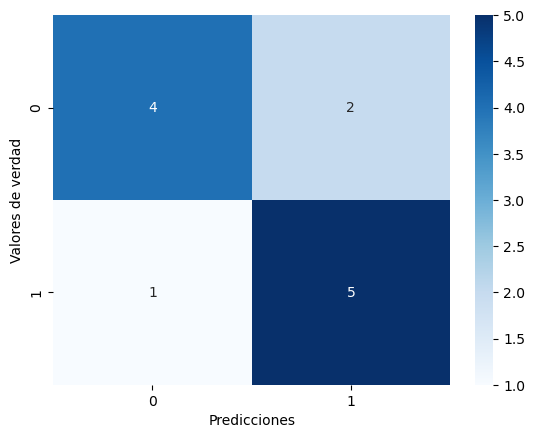

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm ,cmap='Blues',annot=True )
plt.ylabel('Valores de verdad')
plt.xlabel('Predicciones')
plt.show()

La matriz de confusión se interpreta como sigue:

- La diagonal principal representan los aciertos tanto del modelo como del experto.
- La diagonal secundaria representan los errores del modelo.
- Se aspira a que los números de la diagonal principal sean más grande que los de la diagonal secundaria.

Las 4 opciones que conforman la matriz de confusión son:

- **Verdadero Positivo (TP)**: El valor real es positivo y el modelo predijo un valor positivo.

- **Verdadero Negativo (TN)**: El valor real es negativo y el modelo predijo un valor negativo.

- **Falso Negativo (FN)**: El valor real es positivo pero el modelo predijo un valor negativo. También se conoce como **error tipo II**.

- **Falso Positivo (FP)**: El valor real es negativo pero el modelo predijo un valor positivo. También se conoce como **error tipo I**.

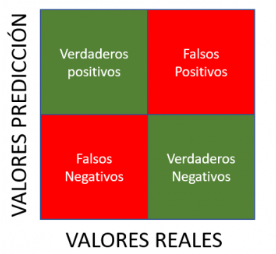

De la matriz de confusión del ejercicio podemos decir que:<br>
$TP\ =\ 5$<br>
$FP\ =\ 2$<br>
$FN\ =\ 1$<br>
$TN\ =\ 4$

In [8]:
TP = 5
FP = 2
FN = 1
TN = 4

## __2) Exactitud o Accuracy__

Se refiere a lo cerca que está el resultado de una medición del valor verdadero, es decir, es la cantidad de predicciones verdaderas que fueron correctas. Se representa como la proporción de los aciertos globales. Se calcula mediante la siguiente ecuación:

### $accuracy = \frac{TP\ +\ TN}{TP\ +\ FP\ +\ FN\ +\ TN}$

In [9]:
# valor de accuracy del ejercicio
accuracy = (TP + TN) / (TP + FP + FN + TN)
accuracy

0.75

## __3) Precisión__

Es el porcentaje de casos positivos detectados. También se interpreta como la capacidad que tiene el modelo de encontrar valores positivos. Es muy útil cuando se tienen datasets simétricos (clases con magnitudes similares)

### $precision = \frac{TP}{TP\ +\ FP}$

In [8]:
# valor de presicion del ejercicio
precision = TP / (TP + FP)
precision

0.7142857142857143

## __4) Sensibilidad o recall__


Es la proporción de casos positivos que fueron correctamente identificadas por el modelo. También se conoce como _tasa de verdaderos positivos_. Un ejemplo en el área de la salud, es la capacidad de poder detectar correctamente la enfermedad entre los enfermos. Viene dada por:

### $recall = \frac{TP}{TP\ +\ FN}$

In [9]:
# valor de sensibilidad del ejercicio
recall = TP / (TP + FN)
recall

0.8333333333333334

## __5) Especificidad o Tasa Negativa Verdadera__

Se trata de la proporción de casos negativos que el modelo ha clasificado correctamente. Indica cuán bien puede el modelo detectar esa clase. Un ejemplo en el área de la salud, es la capacidad de identificar los casos de pacientes sanos entre todos los sanos. Se calcula como sigue:

### $especificidad = \frac{TN}{TN\ +\ FP}$

In [10]:
# valor de especificidad del ejercicio
specificity = TN / (TN + FP)
specificity

0.6666666666666666

## __6) F1_score__

Es una métrica que resume la precisión y sensibilidad en un sólo valor. Es de gran utilidad cuando la distribución de las clases es desigual, ejemplo cuando el número de pacientes con una condición es del 15% y el otro es 85%. Viene dada por:

### $f1\_score = \frac{2\ *\ precision\ *\ recall}{precision\ +\ recall}$

In [15]:
# valor de f1 score
f1_score = (2 * precision * recall) / (precision + recall)
f1_score

0.7692307692307692

## __Consejos Generales sobre la CM y sus metricas__

> Elija mayor precisión para conocer qué tan seguro está de los verdaderos positivos. Mientras que la sensibilidad le servirá para saber si no esta perdiendo positivos.

> Si cree que es mejor tener falsos positivos que falsos negativos, utilice una sensibilidad alta cuando la aparición de falsos negativos le resulta inaceptables pero no le importa tener falsos positivos adicionales. Ejemplo. prefiere que algunas personas sanas sean etiquetadas como diabéticas en lugar de dejar una persona diabética etiquetada como sana.

> Elija precisión si quiere estar más seguro de sus verdaderos positivos. Ejemplo, correo electronicos no deseados en el que se prefiere tener algunos correos electronicos no deseados en su bandeja en lugar de tener correo electronicos reales en la bandeja de SPAM.

> Elija especificidad si desea identificar los verdareos negativos, o lo que es igual, cuando no desea falsos positivos. Ejemplo, al llevar a cabo una prueba de drogas en la que todas las personas que dan positivo irán a la carcel. La idea es que ninguna persona libre de drogas vaya a la carcel. Los falsos positivos aqui son intolerables.

## __Relación entre la Exactitud y la Precisión__

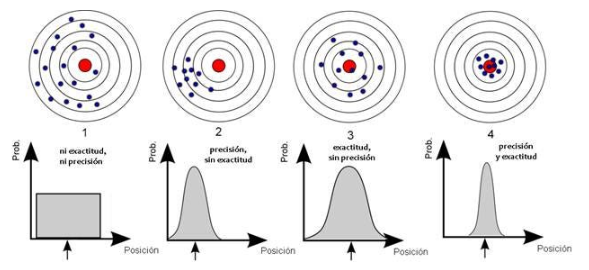

### Casos posibles para cada clase

- **Alta precisión y alto recall:** el modelo de Machine Learning escogido maneja perfectamente esa clase.

- **Alta precisión y bajo recall:** el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

- **Baja precisión y alto recall**: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

- **Baja precisión y bajo recall:** El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

## __Extraer la información de CM__

In [11]:
# metodo ravel para extraer las opciones de la CM
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(4, 2, 1, 5)

## __Obtener las métricas usando Scikit-Learn__

In [12]:
# importamos las metricas de sklearn
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score

##### **Exactitud o Accuracy**

In [13]:
accuracy_score_ = accuracy_score(y_true , y_pred)
accuracy_score_

0.75

##### **Precisión**

In [14]:
precision_score_ = precision_score(y_true , y_pred)
precision_score_

0.7142857142857143

##### **Sensibilidad o Recall**

In [15]:
recall_score_ = recall_score(y_true , y_pred)
recall_score_

0.8333333333333334

##### **F1-score**

In [16]:
f1_score_ = f1_score(y_true , y_pred)
f1_score_

0.7692307692307693

## __Reporte de métricas con scikit-learn__

In [17]:
# importamos la funcion classification_report
from sklearn.metrics import classification_report

In [18]:
# le pasamos los valores reales y de prediccion
print(classification_report(y_true , y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



Las conclusiones de las métricas son:

- En la clase 0 tenemos una alta precision (80% de las predicciones fueron correctas) y un bajo recall lo que indica que hay varios ejemplos de esta clase que no están siendo detectados (Falsos negativos). En conclusión, el modelo no detecta la clase 0 muy bien, pero cuando lo hace es altamente confiable. Además, presenta un f1-score aceptable de 73% lo que indica un buen compromiso entre la precisión y el recall.

- En la clase 1 tenemos una precisión del 71% lo que indica que hay más falsos positivos en comparación con la clase 0. Presenta un alto recall lo que indica que el modelo identifica correctamente el 83% de los ejemplos reales de la clase 1 lo que es un buen desempeño en terminos de sensibilidad. Además presenta un recall similar al de la clase 0.

- El accuracy indica que el modelo clasifica correctamente el 75% de los ejemplos. Esta métrica no refleja bien el desempeño si las clases están desbalanceadas.

> La conclusión general del modelo es que presenta un desempeño razonable clasificando correctamente 3 de cada 4 ejemplos y detecta mejor la clase 1. Sin embargo, la precisión y el recall no están completamente balanceados por lo que el moodelo puede mejorar en ambas clases.

# _Ejercicio 2_:

Tenemos las clases reales de un conjunto de pacientes con diagnóstico de cáncer, donde:<br>

- POS : Paciente positivo para cáncer.<br>
- NEG : Paciente nevativo para cáncer.<br>

También se cuenta con las etiquetas de predicción del algoritmo de IA. Hallar la $CM$, $accuracy$ , $precision$ y $recall$  del problema.

$y\_true\_\ =\ [POS,\ NEG,\ NEG,\ POS,\ NEG,\ NEG,\ POS,\ POS,\ NEG,\ NEG]$ <br>
$y\_pred\_\ =\ [POS,\ NEG,\ POS,\ NEG,\ NEG,\ NEG,\ POS,\ POS,\ POS,\ NEG]$


<b>NOTA:</b> A diferencia del ejercicio anterior, los resultados de los pacientes son cadenas de texto $POS$ y $NEG$ y no número.

In [19]:
y_true_ = ['POS', 'NEG', 'NEG', 'POS', 'NEG', 'NEG', 'POS', 'POS', 'NEG', 'NEG']
y_pred_ = ['POS', 'NEG', 'POS', 'NEG', 'NEG', 'NEG', 'POS', 'POS', 'POS', 'NEG']

Generamos la Matriz de Confusión CM con Scikit-Learn a partir de los valores reales y las predicciones.

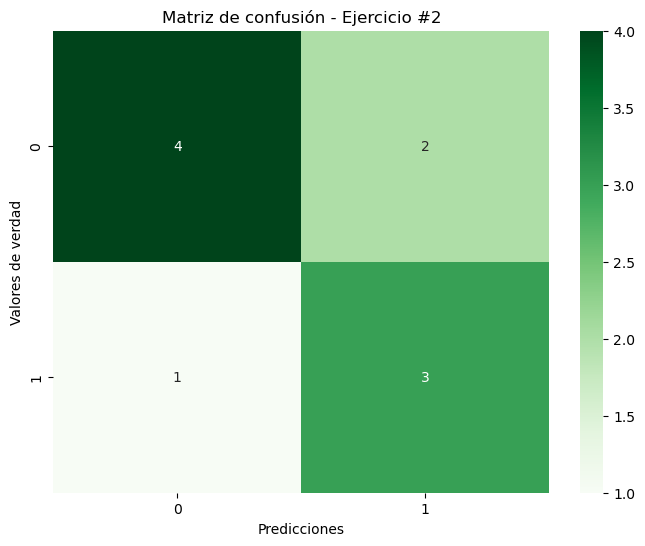

In [20]:
# Importar las librerías a usar
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true_, y_pred_)
fig , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm ,cmap='Greens',annot=True )
plt.title('Matriz de confusión - Ejercicio #2')
plt.ylabel('Valores de verdad')
plt.xlabel('Predicciones')
plt.show()

A pesar que son cadenas de texto, Scikit Learn los clasifica como clase 0 y 1. Veamos la interpretación de los datos dados por la matriz de confusión:

- $TP\ = 3$
- $TN\ = 4$
- $FP\ = 2$
- $FN\ = 1$

Veamos las opciones de CM dadas por Scikit-Learn

In [21]:
# metodo ravel para extraer las opciones de la CM
tn, fp, fn, tp = confusion_matrix(y_true_, y_pred_).ravel()
tn, fp, fn, tp

(4, 2, 1, 3)

Vamos a obtener un reporte general de la clasifcación con CM.

In [22]:
# Se hace la importación de la función classificarion_report
from sklearn.metrics import classification_report

print('*'*54)
print('*','REPORTE DE CLASIFICACIÓN'.center(50, " ") , '*')
print('*'*54)
print(classification_report(y_true_ , y_pred_))

******************************************************
*              REPORTE DE CLASIFICACIÓN              *
******************************************************
              precision    recall  f1-score   support

         NEG       0.80      0.67      0.73         6
         POS       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



Obtenemos los valores de cada métrica por separado para ver si coinciden con el reporte.

In [23]:
# Se calcula cada una de las métricas por separado
print('Accuracy:  ',accuracy_score(y_true_ , y_pred_))
print('Recall:    ',recall_score(y_true_ , y_pred_ , average=None))
print('Precisión: ',precision_score(y_true_ , y_pred_ , average=None))
print('F1-score:  ',f1_score(y_true_ , y_pred_ , average=None))

Accuracy:   0.7
Recall:     [0.66666667 0.75      ]
Precisión:  [0.8 0.6]
F1-score:   [0.72727273 0.66666667]


Las conclusiones de las métricas son:

- Para la clase NEG el modelo presenta un 80% de precisión, es decir, 80% de esas predicciones son correctas. Esto implica que tiene una tasa baja de falsos positivos. De todos los verdaderos negativos, el modelo identifica el 67% indicado por el Recall. Presenta un f1-score balanceado (del 73%), pero hay margen de mejora.

- Para la clase POS, el modelo predice sólo el 60% correctamente. Esto indica una tasa de falsos positivos muy alta en comparación con la clase NEG. El modelo identifica el 75% de los casos que son POS, el 25% de los POS no son detectados. El f1-score es similiar a la clase anterior.

- El accuracy es del 70% lo que indica que el modelo clasifica correctamente el 70% de los ejemplos totales.

- El promedio macro de precisión (macro avg - precision) es del 70% lo que indica que el modelo tiene un 70% de precisión para ambas clases. Tal promedio no pondera el desequilibrio entre clases.

- El promedio macro de recall (macro avg - recall) es del 71%, lo que indica que en promedio, el modelo identifica correctamente el 71% de las instancias de cada clase.

- EL promedio macro de F1-score es de 70% valor que indica una visión equilibrada del desempeño del modelo en ambas clases.

- Los valores de weighted avg ponderan cada métrica según el número de ejemplos en cada clase. En este caso, como NEG tiene más support (6 ejemplos) que POS (4 ejemplos), las métricas están ligeramente sesgadas hacia el desempeño de NEG.

> La conclusión general del modelo es que tiene mejor precisión para NEG, pero un mejor recall para POS. Esto puede indicar que el modelo está sesgado hacia la clase NEG, siendo más conservador al clasificar POS. Como hay más ejemplos de NEG que de POS, puede haber un sesgo del modelo por aprender patrones relacionados con la clase NEG. Para corregirlo, se deben balancear las clases.

# _Ejercicio 3_:

Debemos predecir el tipo de enfermedad crónica no transmisible que tiene el paciente que ingresa a urgencias de la clínica la Cima y ofrecer un mejor servicio de atención desde su ingreso. Para efectos de la solución del problema, contamos con una base de datos de entrenamiento donde la variable de salida son los siguientes diagnósticos:<br>

- 0 : Diabetes<br>
- 1 : EPOC<br>
- 2 : Hipertensión<br>
- 3 : Colesterol<br>

También contamos con las etiquetas de predicción del algoritmo de IA. Hallar la $CM$, $accuracy$ , $precision$ y $recall$  del problema.

$y\_true\ =\ [0,\ 0,\ 0,\ 0,\ 0,\ 1,\ 1,\ 1,\ 1,\ 1,\ 2,\ 2,\ 2,\ 2,\ 2,\ 3,\ 3,\ 3,\ 3,\ 3]$ <br>
$y\_pred\ =\ [1,\ 0,\ 0,\ 2,\ 0,\ 1,\ 1,\ 1,\ 1,\ 1,\ 1,\ 0,\ 2,\ 2,\ 2,\ 3,\ 3,\ 3,\ 3,\ 0]$

## __Matriz de Confusión (CM) para Problemas multiclase__

Se aplica cuando se tienen mas de dos clases.

In [25]:
y_true3 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
y_pred3 = [1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 3, 3, 3, 0]

Vamos a obtener la CM para este problema

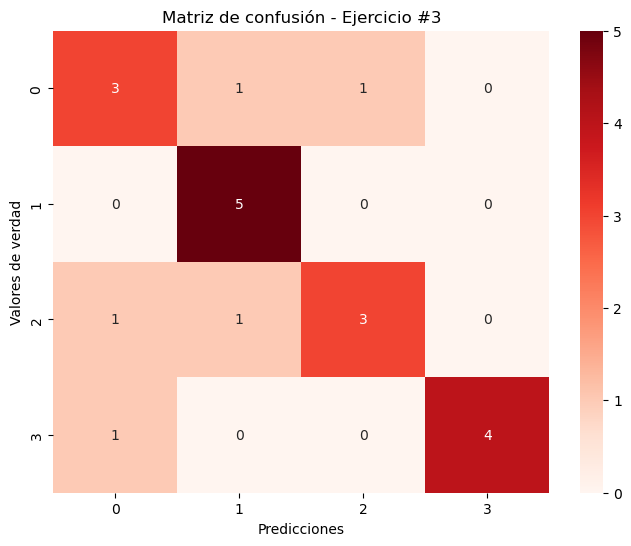

In [26]:
# Se hace la importacion de las librerías a usar.
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true3, y_pred3)
fig , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm ,cmap='Reds',annot=True )
plt.title('Matriz de confusión - Ejercicio #3')
plt.ylabel('Valores de verdad')
plt.xlabel('Predicciones')
plt.show()

De la matriz de consfusion deducimos:

> El modelo predijo correctamente todos los casos para la enfermedad EPOC.

> El modelo solo fallo en 1 caso para la enfermedad Colesterol.

## __Reporte de Metricas__

In [27]:
# Se hace la importación de la función classificarion_report.
from sklearn.metrics import classification_report

print('*'*54)
print('*','REPORTE DE CLASIFICACIÓN DEL PROBLEMA MULTICLASES'.center(50, " ") , '*')
print('*'*54)
print(classification_report(y_true3 , y_pred3))

******************************************************
* REPORTE DE CLASIFICACIÓN DEL PROBLEMA MULTICLASES  *
******************************************************
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.71      1.00      0.83         5
           2       0.75      0.60      0.67         5
           3       1.00      0.80      0.89         5

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.75        20
weighted avg       0.77      0.75      0.75        20



> Cuando el accuracy es 1 en un problema de clasificacion binaria se dice que el modelo esta sobre ajustado debido a que esta acertando todas las predicciones.

> En un problema de clasificacion multiclase es posible encontrar varias clases con recall de 1 y aun asi no se habla de sobreajuste del modelo ya que esta acertando todas las predicciones de una clase pero no la de todas. Recordemos que el recall es la proporcion de ejemplos verdaderos positivos correctamente identificados por el modelo para una clase especifica, en relacion con el total de ejemplos de esa clase.

## __Obtener metricas por separado__

In [35]:
# Se calculan las métricas por separado.
print('Accuracy:  ',accuracy_score(y_true3 , y_pred3))
print('Recall:    ',recall_score(y_true3 , y_pred3 , average=None))
print('Precisión: ',precision_score(y_true3 , y_pred3 , average=None))
print('F1-score:  ',f1_score(y_true3 , y_pred3 , average=None))

Accuracy:   0.75
Recall:     [0.6 1.  0.6 0.8]
Precisión:  [0.6        0.71428571 0.75       1.        ]
F1-score:   [0.6        0.83333333 0.66666667 0.88888889]


> EL accuracy indica que el modelo clasifico correctamente el 75% de los datos. Es una metrica global que no distingue entre clases lo que significa que puede ser engañosa si una clase domina el conjunto de datos.

> La metrica recall indica que el modelo identifica correctamente la clase 2 (recall=1) pero tiene un desempeño bajo para las clases 1 y 3 (recall=0.6)

> La metrica Precision indica que el modelo tiene una alta precision para la clase 4, pero una precision mas baja para las clases 1 y 2. Esto indica que el modelo tiende a generar mas falsos positivos en esas clases.

> El modelo funciona mejor en la clase 4 y 2. Sin embargo, tiene una desempeño moderado en las clases 1 y 3.

# _Ejercicio 4_:


Debemos predecir la red social preferida para hacer compras de nuestros clientes y así enviar publicidad a través de esta, para efectos del problema, contamos con una base de datos de entrenamiento donde la variable de salida son las siguiente redes sociales:<br>
0 : Facebook<br>
1 : Instagram<br>
2 : Twitter<br>
3 : TikTok<br>
También contamos con las etiquetas de predicción del algoritmo de IA. Hallar la $CM$, $accuracy$ , $precision$ y $recall$  del problema.

$y\_true\ =\ [0,\ 0,\ 0,\ 0,\ 0,\ 1,\ 1,\ 1,\ 1,\ 1,\ 2,\ 2,\ 2,\ 2,\ 2,\ 3,\ 3,\ 3,\ 3,\ 3]$ <br>
$y\_pred\ =\ [1,\ 0,\ 0,\ 2,\ 0,\ 1,\ 1,\ 1,\ 1,\ 1,\ 1,\ 0,\ 2,\ 2,\ 2,\ 3,\ 3,\ 3,\ 3,\ 0]$

In [37]:
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
y_pred = [1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 3, 3, 3, 0]

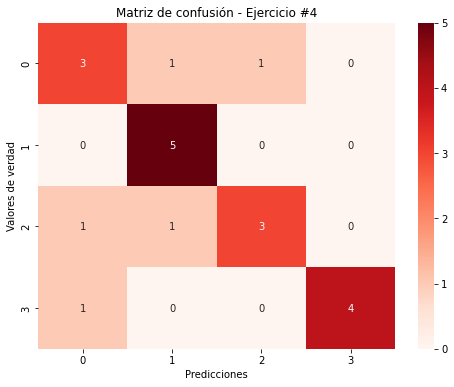

In [39]:
# Se hace la importar de las librerías a usar.
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
fig , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm ,cmap='Reds',annot=True )
plt.title('Matriz de confusión - Ejercicio #4')
plt.ylabel('Valores de verdad')
plt.xlabel('Predicciones')
plt.show()

In [ ]:
# Se hace la importación de la función classificarion_report.
from sklearn.metrics import classification_report

print('*'*54)
print('*','REPORTE DE CLASIFICACIÓN DEL PROBLEMA MULTICLASES'.center(50, " ") , '*')
print('*'*54)
print(classification_report(y_true , y_pred))

******************************************************
* RERPOTE DE CLASIFICACIÓN DEL PROBLEMA MULTICLASES  *
******************************************************
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.71      1.00      0.83         5
           2       0.75      0.60      0.67         5
           3       1.00      0.80      0.89         5

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.75        20
weighted avg       0.77      0.75      0.75        20



In [41]:
# Se calculan las métricas por separado.
print('Accuracy:  ',accuracy_score(y_true , y_pred))
print('Recall:    ',recall_score(y_true , y_pred , average=None))
print('Precisión: ',precision_score(y_true , y_pred , average=None))
print('F1-score:  ',f1_score(y_true , y_pred , average=None))

Accuracy:   0.75
Recall:     [0.6 1.  0.6 0.8]
Precisión:  [0.6        0.71428571 0.75       1.        ]
F1-score:   [0.6        0.83333333 0.66666667 0.88888889]


Las conclusiones de las metricas son:

- El modelo clasifica correctamente el 75% de los ejemplos totales. El accuracy puede dar un resultad engañoso cuando las clases estan desbalanceadas. Sin embargo, en este caso, las clases estan perfectamente balanceadas debido a que cada una fue entrenada con 5 ejemplos.

- Las clases 1 y 3 tienen valores bajos de recall (60%) lo que indica que el modelo tiene problemas para capturar algunos casos positivos de estas clases.

- La precision mas bajas es para la clase 1 (60%), lo que indica que el modelo realiza muchas predicciones incorrectas para esta clase.

- Las clases 1 y 3 tienen el desempeño mas bajo segun sus valores de f1-score.

> La conclusion general del modelo es que las clases 2 y 4  tienen un excelente desempeño, mientras que las clases con problemas para detectar los casos positivos son la 1 y 3.